In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [5]:
# загружаем данные в датафрейм,  + целевая переменная variety
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df = data.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width', 'petal length (cm)': 'petal_length','petal width (cm)': 'petal_width'}) 
iris_frame = df[['sepal_length', 'sepal_width']]
iris_frame["variety"] = iris.target
data_class = iris.target

<ipython-input-5-7b2c98329f15>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_frame["variety"] = iris.target


In [6]:
iris_frame.head()

,sepal_length,sepal_width,variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [66]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_frame, data_class, test_size=0.25)

In [8]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
lda = LinearDiscriminantAnalysis()

In [10]:
# Модель изучает отношения между цифрами (x_train) и метками (y_train)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
# Делаем прогноз на тестовых данных
prediction = lda.predict(X_test)
prediction

array([2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2])

In [18]:
# проверяем точность  - насколько факт совпал с прогнозом 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.8157894736842105

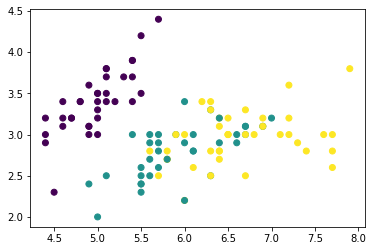

In [19]:
# визуализируем дискриминантную линию по 2 признакам (в тестовой выборке мы изначально оставили только два признака)
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)
plt.show()

In [20]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal_length', 'sepal_width']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal_width', 'sepal_width']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

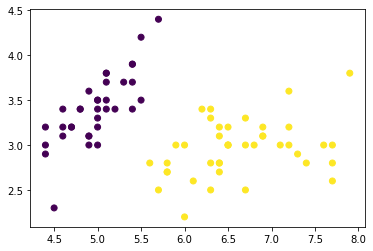

In [21]:
# визуализируем на основании двух признаков и двух классов 
plt.scatter(small_train['sepal_length'], small_train['sepal_width'], c=sy_train)
plt.show()

In [25]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [24]:
# выведем центроиды
lda_small.means_

array([[4.98285714, 3.40857143],
       [6.62682927, 2.96097561]])

<ipython-input-26-bf497de24f7a>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


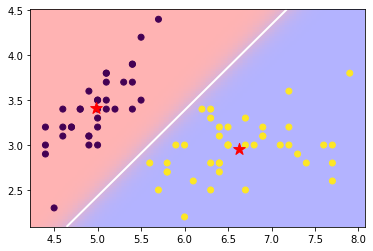

In [26]:
# строим scatter plot
plt.scatter(small_train['sepal_length'], small_train['sepal_width'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [27]:
# на основании нашей визуализации и выведенных коэффициентов, мы видим, что оба признака одинаково важны для классификации 
lda_small.coef_

array([[  9.7112758 , -10.16226679]])

КЛАСТЕРИЗАЦИЯ 
Подобрать оптимальное число кластеров для алгоритма kmeans и визуализировать полученную кластеризацию

In [30]:
# генерируем искуственные данные для примера
from sklearn.datasets.samples_generator import make_blobs, make_moons


In [46]:
# 200 точек с 2 центрами, СКО - 2.5
X, y_true = make_blobs(n_samples = 200, centers = 2, cluster_std = 2.5, random_state = 0)

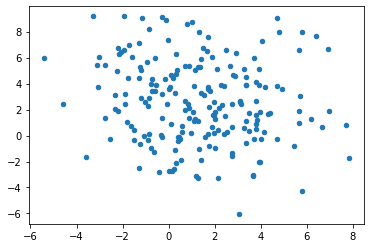

In [47]:
# визуализируем наш набор данных 
plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.show()

In [ ]:
# создадим объект KMeans вместе с указанием количества кластеров, обучим модель и сделаем прогноз:

In [48]:
from sklearn.cluster import KMeans

In [49]:
# fit predict обучается на данных и каждому объекту присваивает кластер
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1])

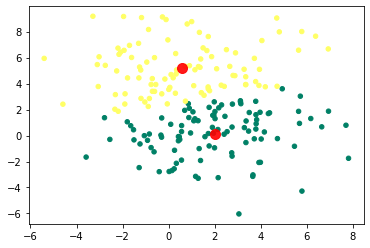

In [50]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 100, alpha = 0.9);
plt.show()